# lab1_4 代码部分


库导入

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pylab as plt
import math

定义插值函数构建

In [2]:
def Linterpolation(ra:np.ndarray,f,x:sp.symbols):
    """
    Linear interpolation.
    :param ra:插值x序列
    :param r:由于是一元表达式，所以只用传入一个一元变量
    :param f:传入函数表达式
    :return:返回一个sympy表达式，后续可以带入实际值运算
    """
    y = 0
    
    n=ra.size
    for k in range(0,n):
        l=1
        for j in range(0,n):
            if j==k:
                continue
            else:
                l=l*(x-ra[j])/(ra[k]-ra[j])
        y=y+l*f(ra[k])
    return sp.simplify(y)


## 问题四

### 内推比外推更可靠吗

(1)定义f(x)
$$
f(x) =  \sqrt{x} 
$$

In [3]:
def f1(x):
    """
    :param x:运算参数
    :return:返回计算结果
    """
    return math.sqrt(x)

In [4]:

evals = np.array([5,50,115,185])
# result_L=np.zeros(evals.size)
result_R=np.array([f1(i) for i in evals])

In [5]:

def work(ra:np.array):
    x=sp.symbols('x')
    print("插入值为",ra)
    y=Linterpolation(ra,f1,x)
    print("多项式表达式：",y)
    result_L=np.array([y.evalf(subs={x:i}) for i in evals])

    for i in range(0,evals.size):

        js = abs((result_L[i]-result_R[i])/result_R[i])
        print("x:",evals[i],"估计值:",round(result_L[i],4),"真实值:",round(result_R[i],4),"相对误差：",round(js,4))

    rx = np.linspace(0, 200, 2*40 + 1)
    ry1 = np.array([f1(i) for i in rx])
    ry2 = np.array([y.evalf(subs={x:i}) for i in rx])
    plt.plot(rx, ry1, 'b-', label='f(x)')
    plt.plot(rx, ry2, 'r-', label='y(x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

插入值为 [1 4 9]
多项式表达式： -0.0166666666666667*x**2 + 0.416666666666667*x + 0.6
x: 5 估计值: 2.2667 真实值: 2.2361 相对误差： 0.0137
x: 50 估计值: -20.2333 真实值: 7.0711 相对误差： 3.8614
x: 115 估计值: -171.9000 真实值: 10.7238 相对误差： 17.0298
x: 185 估计值: -492.7333 真实值: 13.6015 相对误差： 37.2265


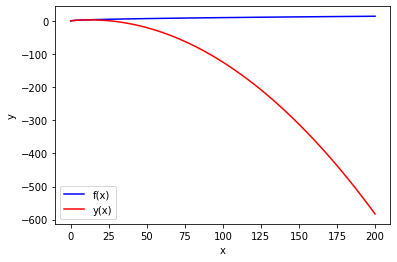

In [6]:
work(np.array([1,4,9]))

插入值为 [36 49 64]
多项式表达式： -0.000366300366300372*x**2 + 0.108058608058609*x + 2.58461538461538
x: 5 估计值: 3.1158 真实值: 2.2361 相对误差： 0.3934
x: 50 估计值: 7.0718 真实值: 7.0711 相对误差： 0.0001
x: 115 估计值: 10.1670 真实值: 10.7238 相对误差： 0.0519
x: 185 估计值: 10.0388 真实值: 13.6015 相对误差： 0.2619


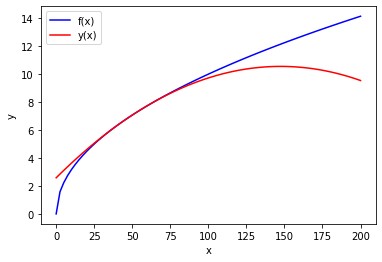

In [7]:
work(np.array([36,49,64]))

插入值为 [100 121 144]
多项式表达式： -9.4108789760964e-5*x**2 + 0.0684170901562204*x + 4.0993788819876
x: 5 估计值: 4.4391 真实值: 2.2361 相对误差： 0.9852
x: 50 估计值: 7.2850 真实值: 7.0711 相对误差： 0.0302
x: 115 估计值: 10.7228 真实值: 10.7238 相对误差： 0.0001
x: 185 估计值: 13.5357 真实值: 13.6015 相对误差： 0.0048


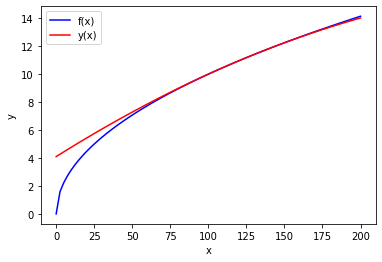

In [8]:
work(np.array([100,121,144]))

插入值为 [169 196 225]
多项式表达式： -4.56121145776291e-5*x**2 + 0.0536854588578715*x + 5.22988505747128
x: 5 估计值: 5.4972 真实值: 2.2361 相对误差： 1.4584
x: 50 估计值: 7.8001 真实值: 7.0711 相对误差： 0.1031
x: 115 估计值: 10.8005 真实值: 10.7238 相对误差： 0.0072
x: 185 估计值: 13.6006 真实值: 13.6015 相对误差： 0.0001


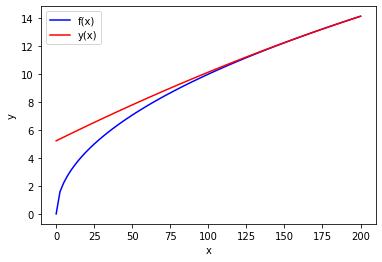

In [9]:
work(np.array([169,196,225]))